# ML Supervised Learning

## Preparation of the data

### Overview of the data

In [5]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [6]:
import pandas as pd
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [7]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [8]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [9]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

### Visualisation of the data

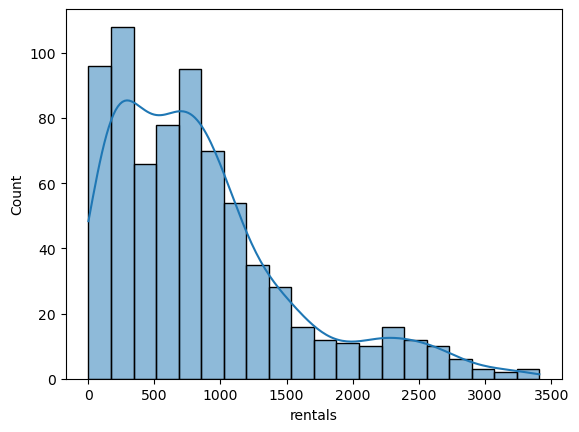

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(bike_data_raw['rentals'],kde=True)
plt.show()

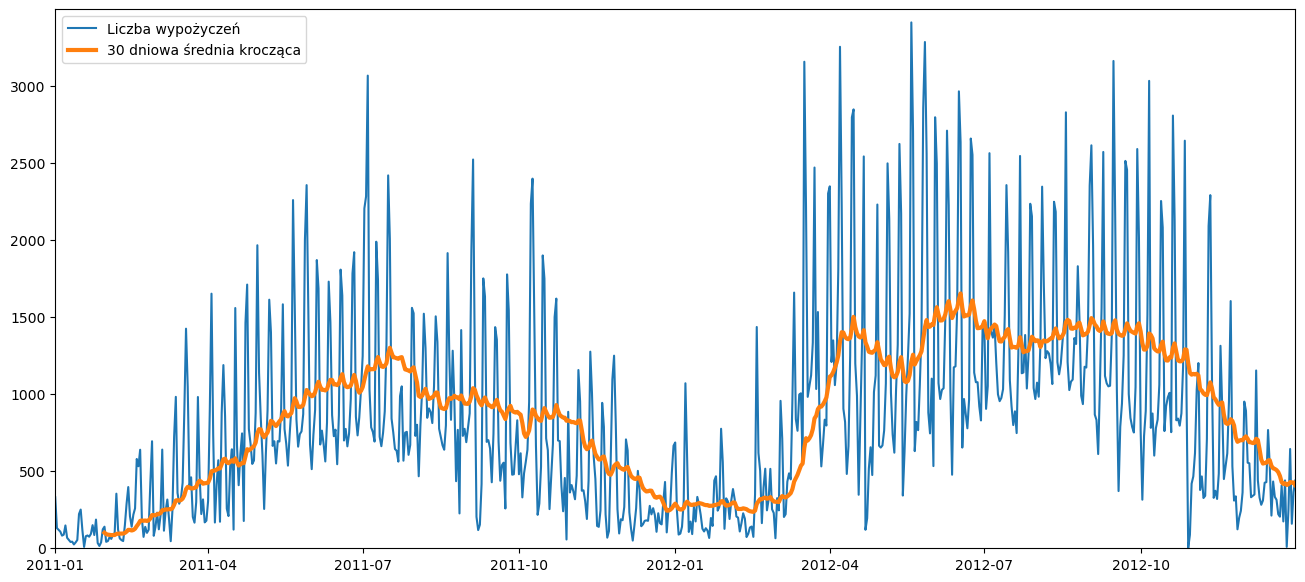

In [12]:

plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Liczba wypożyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

In [13]:
print('Przed usunięciem:')
display(bike_data_raw)
print('Po usunięciu:')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

Przed usunięciem:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


Po usunięciu:


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [14]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

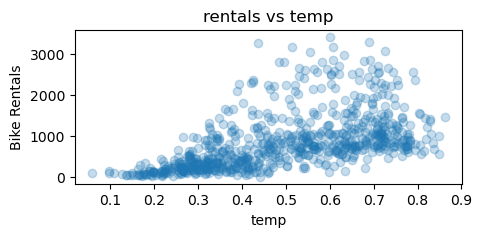

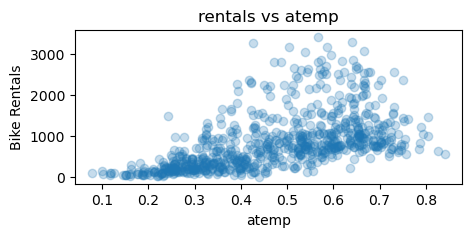

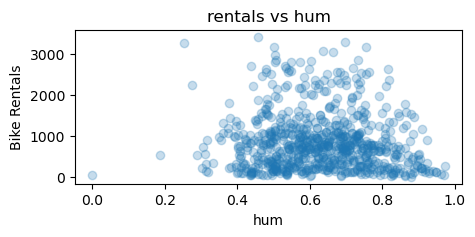

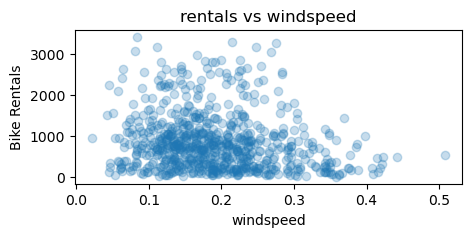

In [15]:
for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(5, 2))
    plt.scatter(bike_data[numeric_feature], bike_data[target], alpha=0.25)
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike Rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()

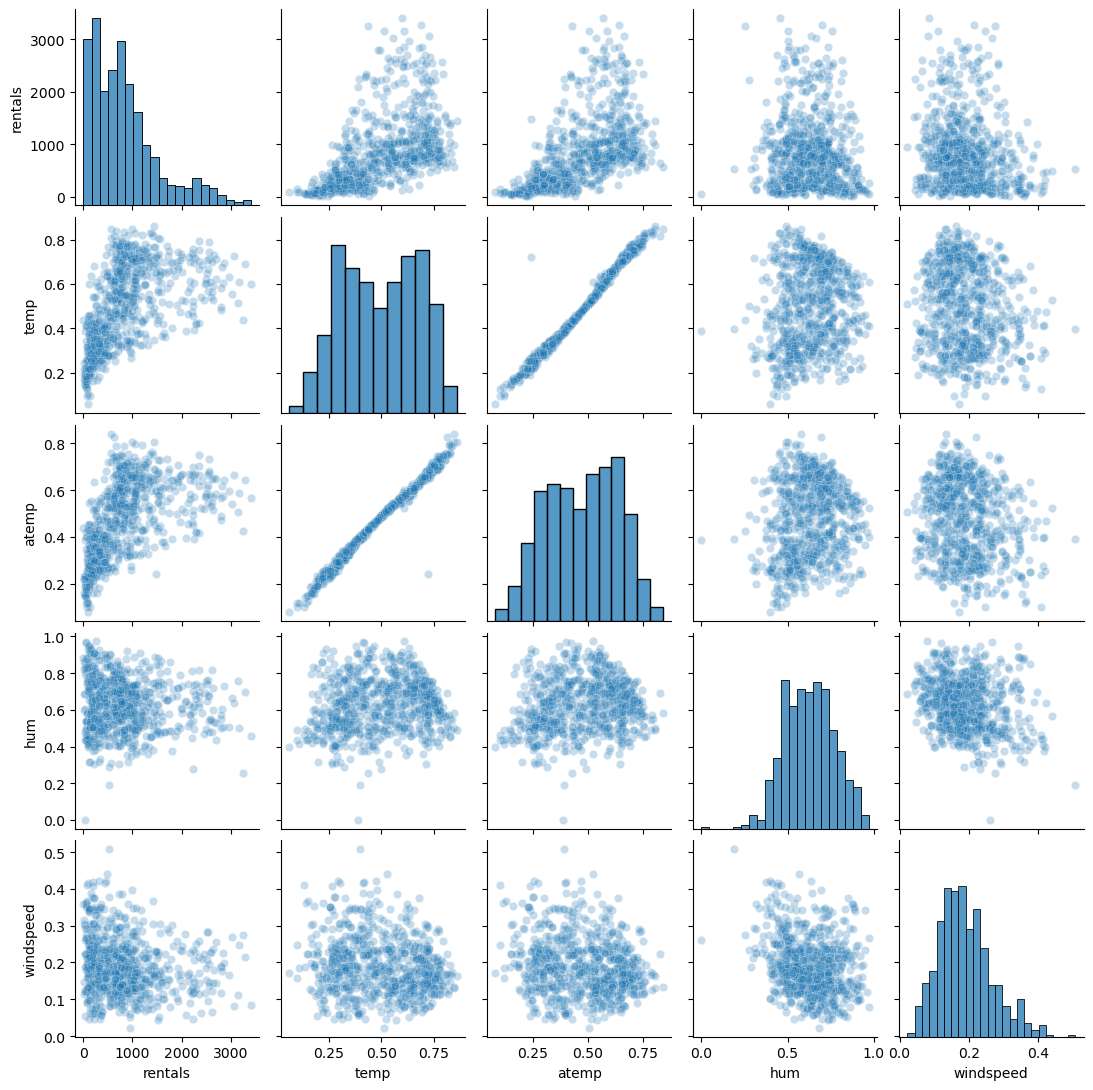

In [16]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11) #ustawiamy rozmiar wykresu
plt.show()

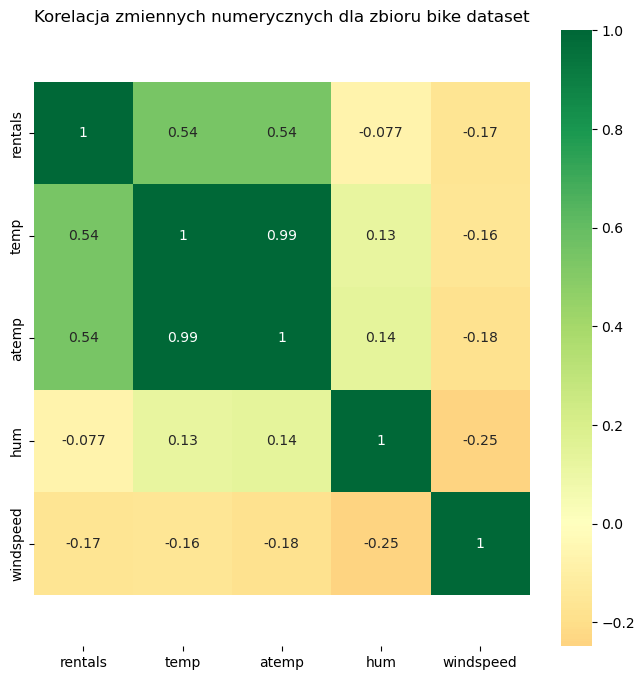

In [17]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
bike_data.head()


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [19]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


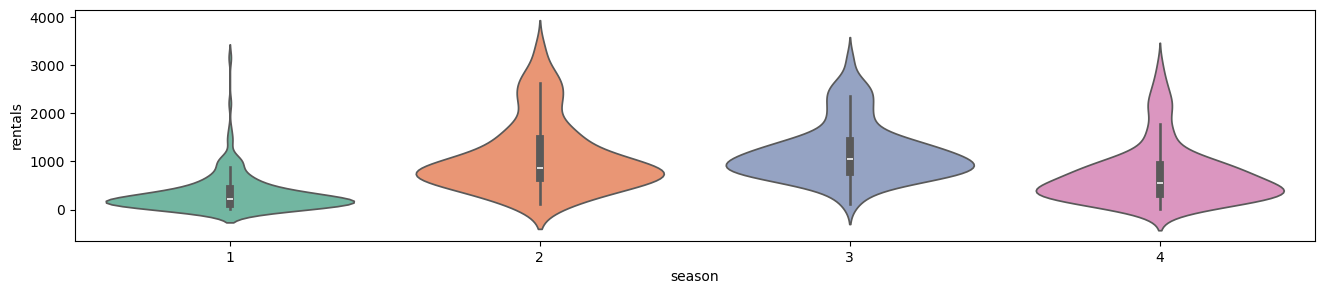

C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


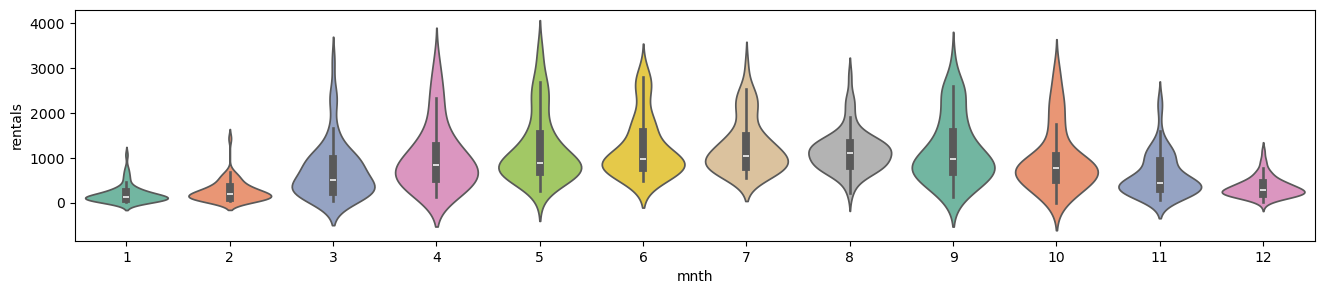

C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


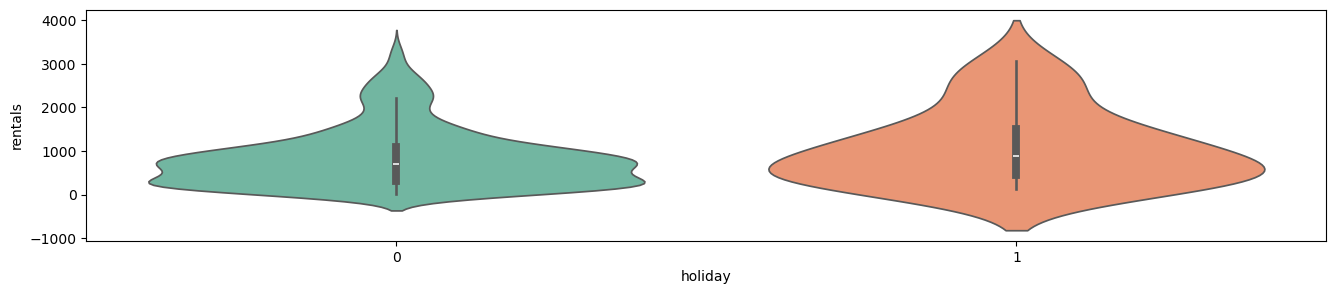

C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


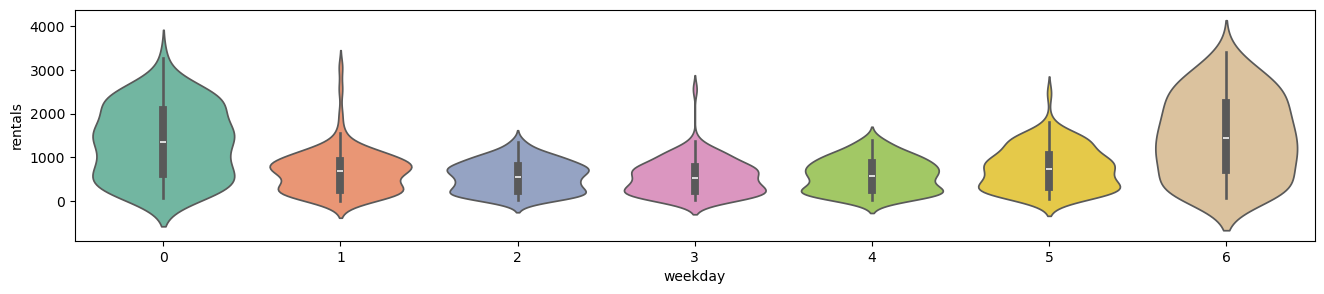

C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


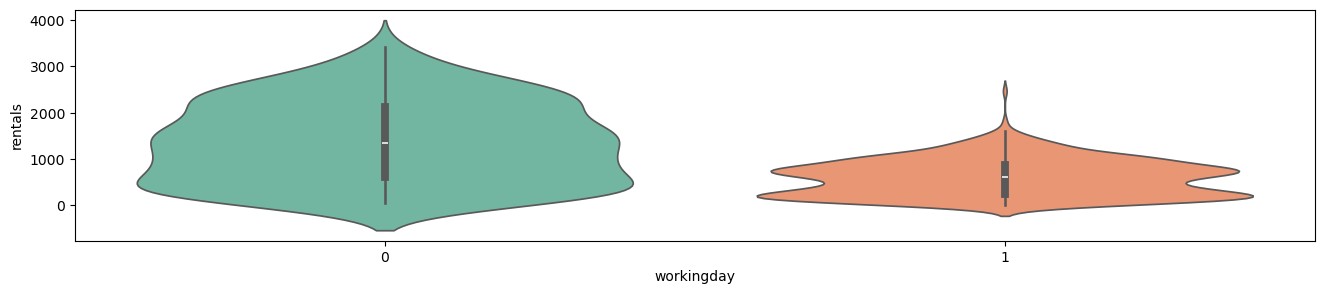

C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


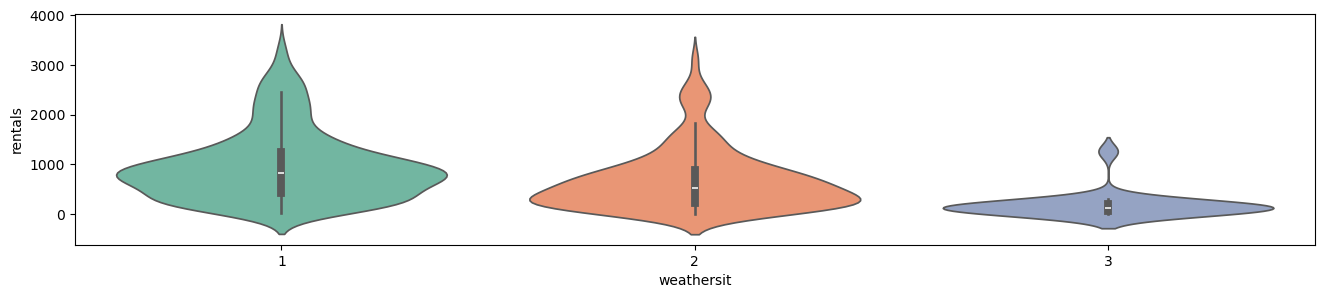

In [20]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

## Model preparation

In [22]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


In [23]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('X:')
print(X.values[:3])
print('\ny:')
print(y.values[:3])

X:
[[0.344167]
 [0.363478]
 [0.196364]]

y:
[331 131 120]


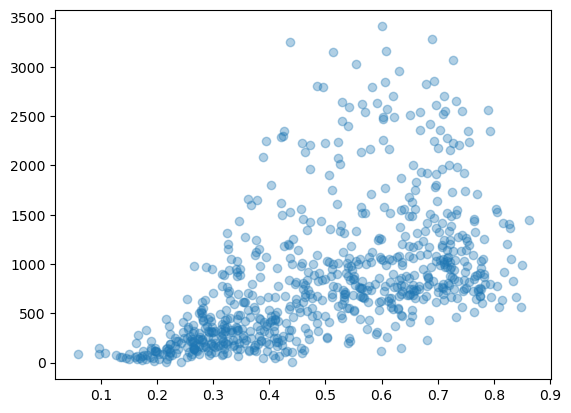

In [24]:
plt.scatter(X, y, alpha=0.35)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 1), y.shape (731,)

X_train.shape: (584, 1), y_train.shape (584,)
X_test.shape: (147, 1), y_test.shape (147,)


### Linear Regression (X: temp, Y: rentals)

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() # inicjalizacja modelu
lr_model.fit(X_train, y_train) # trenowanie modelu

LinearRegression()

In [28]:
print(lr_model.intercept_)
print(lr_model.coef_)

-179.96286312537427
[1990.31869846]


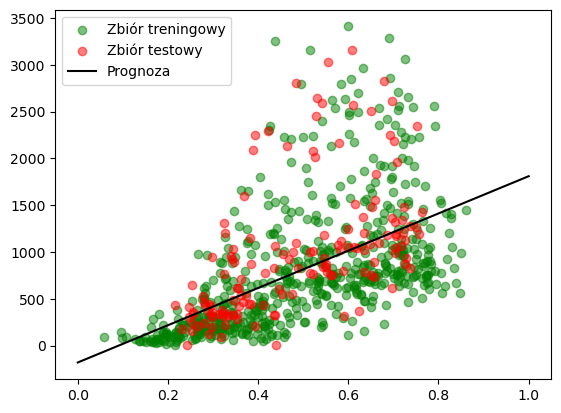

In [29]:
import numpy as np
X_linspace = np.linspace(0, 1, 100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

# Rysowanie wykresu
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')

plt.show()

In [30]:
X_new = [[0.3],
         [0.7]]
predicted_data = lr_model.predict(X_new)
print(predicted_data)

[ 417.13274641 1213.2602258 ]


In [31]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [32]:
print('Predykcja:')
print(np.round(y_predict_test[:5]).astype(int))
print('Wartość prawdziwa:')
print(y_test.values[:5])

Predykcja:
[1285 1313 1324 1245 1198]
Wartość prawdziwa:
[1278 1263 1196 1065 2247]


#### Metrics: R^2

In [34]:
from sklearn.metrics import r2_score
r2_score_for_linear_regression = r2_score(y_train, y_predict_train)
print(f'Train R^2: {r2_score_for_linear_regression}')

Train R^2: 0.30617863454631344


#### Metrics: MAE

In [36]:
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
MAE_lr_x_temp_train = mean_absolute_error(y_test, y_predict_test)
print(f'Test MAE: {MAE_lr_x_temp_train}')

Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


#### Metrics: MAPE

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
MAPE_lr_x_temp_train = mean_absolute_percentage_error(y_test, y_predict_test)
print(f'Test MAPE: {MAPE_lr_x_temp_train}')

Train MAPE: 0.9668581511778533
Test MAPE: 2.9864925318560496


#### Metrics: MSE

In [40]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
MSE_lr_x_temp_train = mean_squared_error(y_test, y_predict_test)
print(f'Test MSE: {MSE_lr_x_temp_train}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


#### Metrics: RMSE

In [42]:
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
RMSE_lr_x_temp_train = sqrt(mean_squared_error(y_test, y_predict_test))
print(f'Test RMSE: {RMSE_lr_x_temp_train}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


#### Visualisation of errors

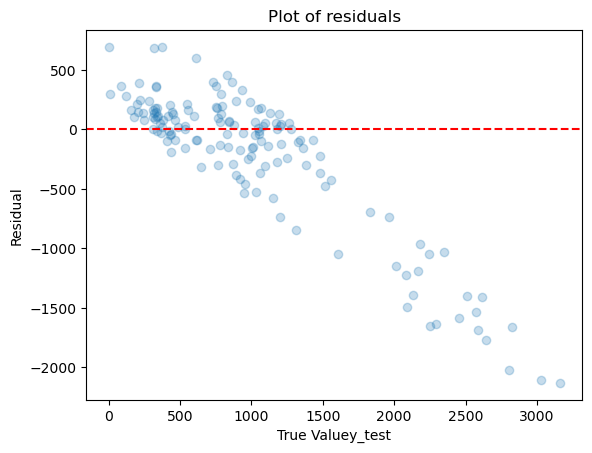

In [44]:
errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

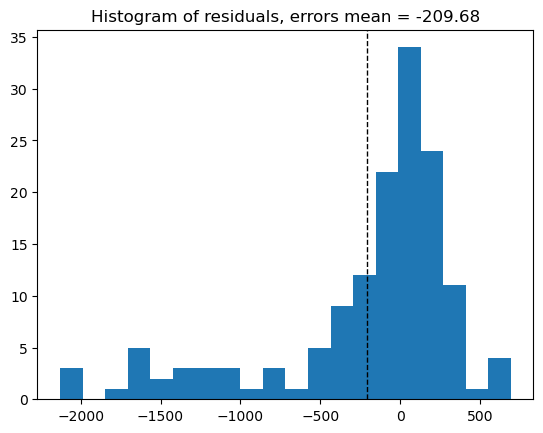

In [45]:
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

## Model PolynomialFeatures

C:\Users\wikto\AppData\Local\Temp\ipykernel_15992\2299550854.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)


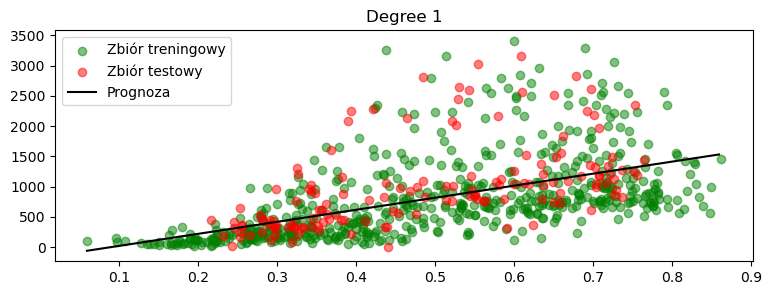

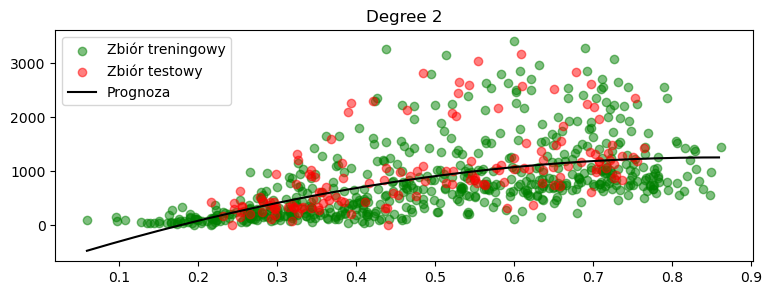

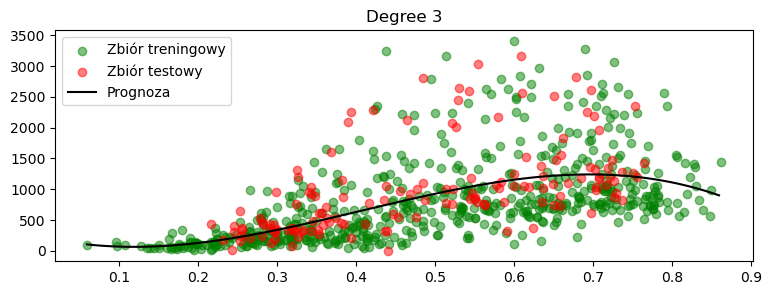

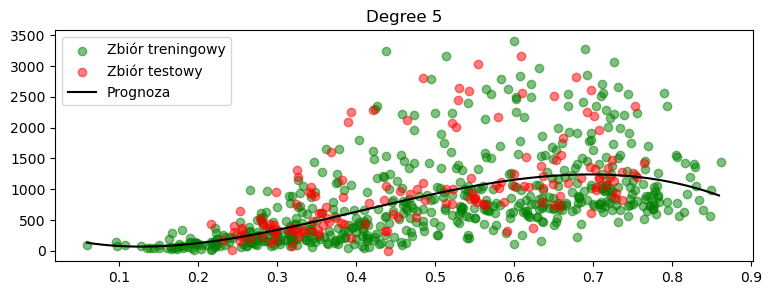

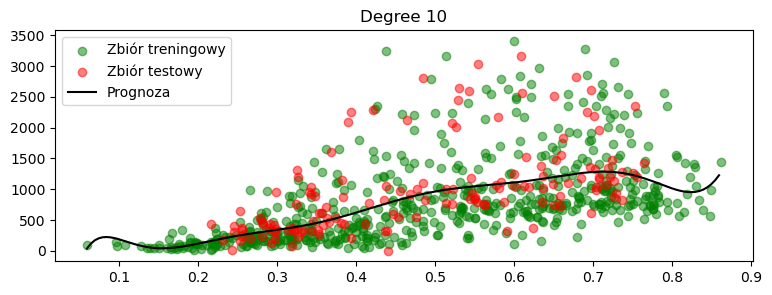

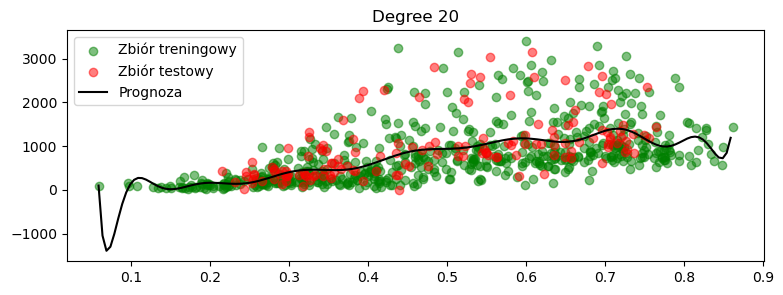

In [47]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 5, 10, 20]:

    # Transformacja naszego X
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    # Trenowanie naszego modelu
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))

    # Wizualizacja wartości ze zbioru treningowego oraz testowgo
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    ########## Wizualizacja wielomianu ##########
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # Predykcja modelu na zbiorze testowym - najpierw jednak należy przekształcić zbiór testowy
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

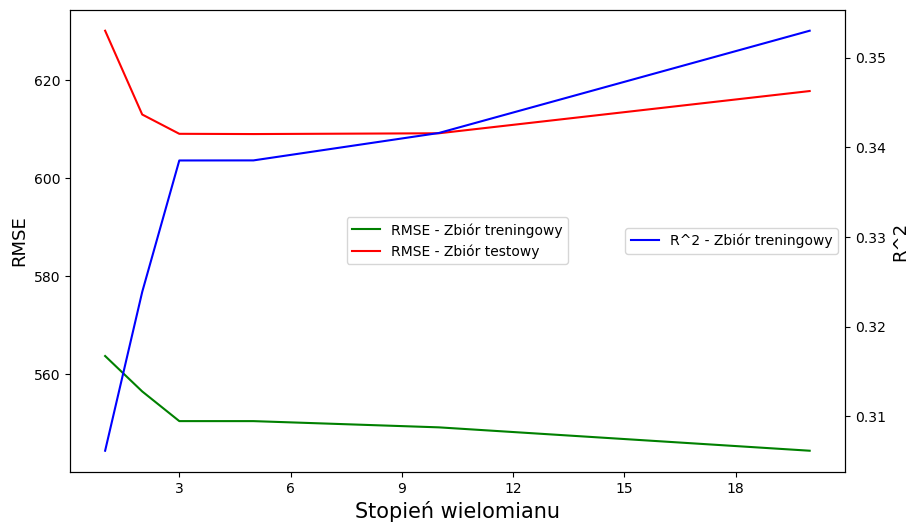

In [48]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Zbiór treningowy')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()

#### GridSearchCV

In [50]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

Degree 1: RMSE values for each fold: [328.73724547551876, 612.7896749883206, 517.8354502509376, 547.2640471355878, 825.8292556510874]
Degree 1: Mean RMSE: 566.4911347002904
Degree 1: Standard Deviation RMSE: 160.41432864806887

Degree 2: RMSE values for each fold: [343.81333016635875, 588.054668961372, 550.3960784578891, 534.8991883481539, 826.4247069416942]
Degree 2: Mean RMSE: 568.7175945750936
Degree 2: Standard Deviation RMSE: 154.17403731624182

Degree 3: RMSE values for each fold: [313.4368960279334, 567.331499171388, 573.7254681031168, 533.4989552260511, 819.0487908314582]
Degree 3: Mean RMSE: 561.4083218719895
Degree 3: Standard Deviation RMSE: 160.52050843924314

Degree 4: RMSE values for each fold: [314.5588684915692, 567.3657006974199, 575.4867041306039, 535.7340890520762, 819.0669613206111]
Degree 4: Mean RMSE: 562.442464738456
Degree 4: Standard Deviation RMSE: 160.13128195313132

Degree 5: RMSE values for each fold: [314.7880000889794, 568.9394433486164, 580.4696262943463

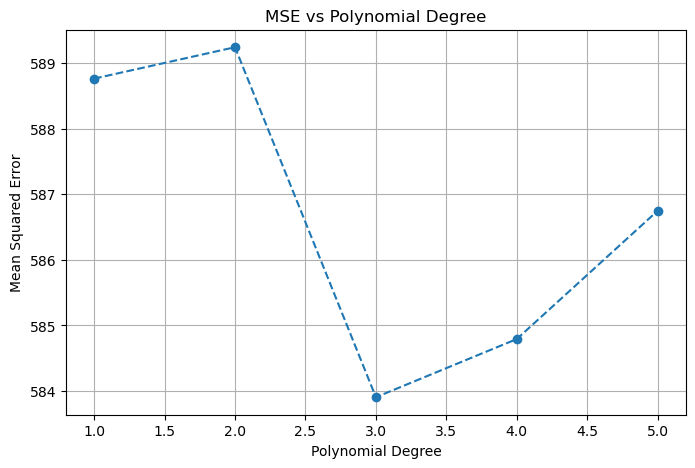


Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

RMSE: 609.076780249834


In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

# Nasz model sprawdzi te hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Inicjalizujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)
# Uczymy Grid Search, podajemy X_train - Pipeline za nas zrobi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
# Get MSE values (negative MSE, so take the absolute value)
mse_scores = -polynomial_regression_gridsearch.cv_results_['mean_test_score']
degrees = params['polynomialfeatures__degree']
mse_scores_root = np.sqrt(mse_scores)


# Assuming 'grid_search' is your fitted GridSearchCV object
cv_results = polynomial_regression_gridsearch.cv_results_

# Get the number of folds
n_folds = polynomial_regression_gridsearch.n_splits_  # or cv if cv is an integer

# Get the degrees tested
degrees = params['polynomialfeatures__degree']

# Loop through the degrees and folds to extract RMSE values
rmse_scores = {}
for degree_idx, degree in enumerate(degrees):
    rmse_scores[degree] = []
    for fold in range(n_folds):
        # Construct the key to access the score for this fold and degree
        score_key = f'split{fold}_test_score'

        # Get the negative MSE; we take the absolute value and then sqrt
        neg_mse = cv_results[score_key][degree_idx] # Access the score for the specific degree
        rmse = np.sqrt(-neg_mse) # Invert the negative MSE and take the sqrt
        rmse_scores[degree].append(rmse)

# Print the RMSE values for each fold and degree
for degree, rmse_list in rmse_scores.items():
    print(f"Degree {degree}: RMSE values for each fold: {rmse_list}")
    print(f"Degree {degree}: Mean RMSE: {np.mean(rmse_list)}")
    print(f"Degree {degree}: Standard Deviation RMSE: {np.std(rmse_list)}\n")


# Convert to DataFrame for easier viewing (optional)
import pandas as pd
rmse_df = pd.DataFrame(rmse_scores)
print(rmse_df)

# Example: Access RMSE for degree 3, fold 2 (assuming 5 folds)
if 3 in rmse_scores and len(rmse_scores[3]) >= 2: # Check if degree 3 exists and has at least 3 values
    rmse_degree3_fold2 = rmse_scores[3][1]  # Index 1 corresponds to the 2nd fold (0-indexed)
    print(f"RMSE for degree 3, fold 2: {rmse_degree3_fold2}")




# Plot MSE vs Polynomial Degree
plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_scores_root, marker='o', linestyle='dashed')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)
plt.show()

print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

# Przekazujemy najlepszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

#### GridSearchCV with many variables (not only temperatur)

In [53]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


#### Regularisation

In [55]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922694


In [56]:
feature_names = polynomial_regression_model.named_steps['polynomialfeatures'].get_feature_names_out()
# Get coefficients
coefficients = polynomial_regression_model.named_steps['elasticnet'].coef_
# Print non-zero terms
for name, coef in zip(feature_names, coefficients):
    if coef != 0:
        print(f"{name}: {coef}")

temp: 3201.4838757419525
windspeed: -1117.8816927492376
hum^2: -623.1210188008049
temp^5: -2739.1100844377092
temp hum^4: -79.92894125474723
hum^5: -219.7034048122895


#### Numerical & Catigorical variables Elastic Net

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.9379418443879


In [59]:
MAE_num_catigorical_variables_Elastic_Net = mean_absolute_error(y_test, predictions)
MAPE_num_catigorical_variables_Elastic_Net = mean_absolute_percentage_error(y_test, predictions)
MSE_num_catigorical_variables_Elastic_Net = mean_squared_error(y_test, predictions)
RMSE_num_catigorical_variables_Elastic_Net  = sqrt(mean_squared_error(y_test, predictions))

#### Numerical & Catigorical variables: Random forest

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define feature groups
X = bike_data[numeric_features + categorical_features].copy()
y = bike_data[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Define numerical and categorical transformers
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Replace ElasticNet with RandomForestRegressor
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Define hyperparameter grid for Random Forest
params = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees
    'regressor__max_depth': [None, 10, 20, 30],  # Tree depth
    'regressor__min_samples_split': [2, 5, 10],  # Minimum samples to split
    'regressor__min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
}

# Perform GridSearchCV
final_gridsearch = GridSearchCV(final_pipeline, params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
final_gridsearch.fit(X_train, y_train)

# Get the best model and parameters
final_model = final_gridsearch.best_estimator_
print("\nBest hyperparameters:", final_gridsearch.best_params_, "\n")

# Make predictions
predictions = final_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Random Forest RMSE: {rmse}')



Best hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100} 

Random Forest RMSE: 366.1682693077199


In [62]:
print(f'Random Forest MAE: {mean_absolute_error(y_test, predictions)}')

Random Forest MAE: 261.5545391349274


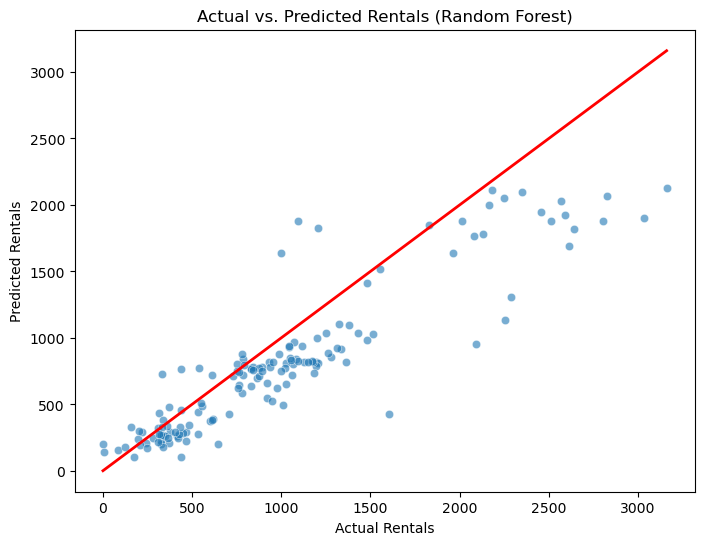

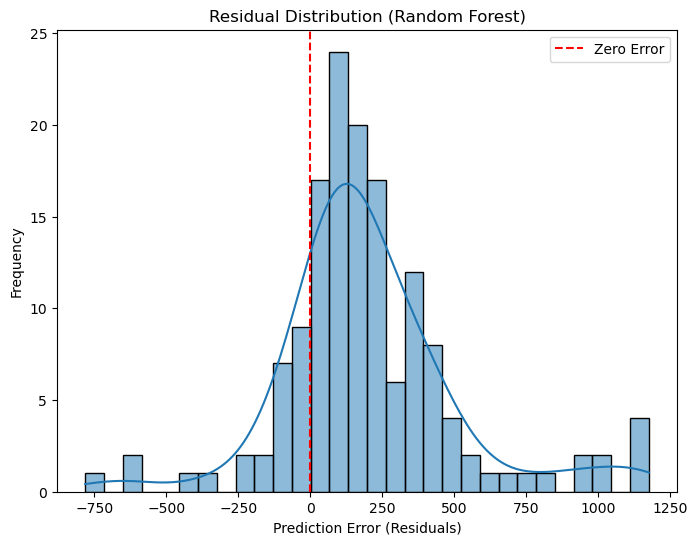

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract actual and predicted values
y_actual = y_test
y_predicted = predictions

# Scatter plot: Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_predicted, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r', lw=2)  # Ideal line (y = x)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs. Predicted Rentals (Random Forest)")
plt.show()

# Residual plot: Error distribution
residuals = y_actual - y_predicted
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest)")
plt.legend()
plt.show()


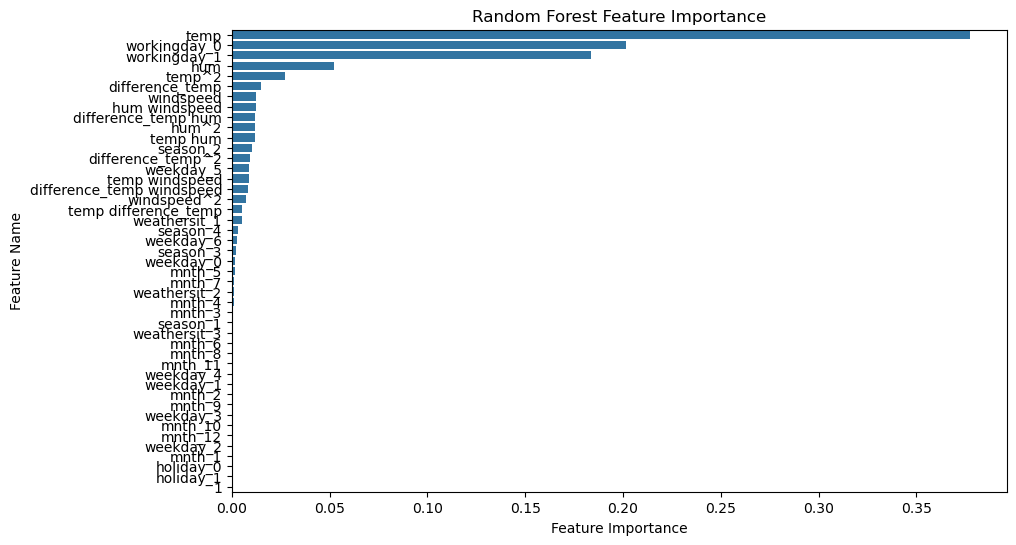

In [64]:
# Extract feature importance from the trained Random Forest model
rf_model = final_model.named_steps['regressor']
feature_importances = rf_model.feature_importances_

# Get transformed feature names
num_features = numeric_features
poly_transformer = final_model.named_steps['preprocessor'].named_transformers_['num'].named_steps['polynomialfeatures']
poly_feature_names = poly_transformer.get_feature_names_out(num_features)

cat_feature_names = final_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine feature names
import numpy as np
feature_names = np.concatenate([poly_feature_names, cat_feature_names])

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")
plt.show()


In [65]:
MAE_num_catigorical_variables_Random_Forest = mean_absolute_error(y_test, predictions)
MAPE_num_catigorical_variables_Random_Forest = mean_absolute_percentage_error(y_test,predictions)
MSE_num_catigorical_variables_Random_Forest = mean_squared_error(y_test, predictions)
RMSE_num_catigorical_variables_Random_Forest  = sqrt(mean_squared_error(y_test, predictions))

# Zadanie 13.5 Comparison of the performance of the models using various metrics

In [67]:
print(MAE_lr_x_temp_train)
print(MAE_num_catigorical_variables_Random_Forest)

391.02879410802956
261.5545391349274


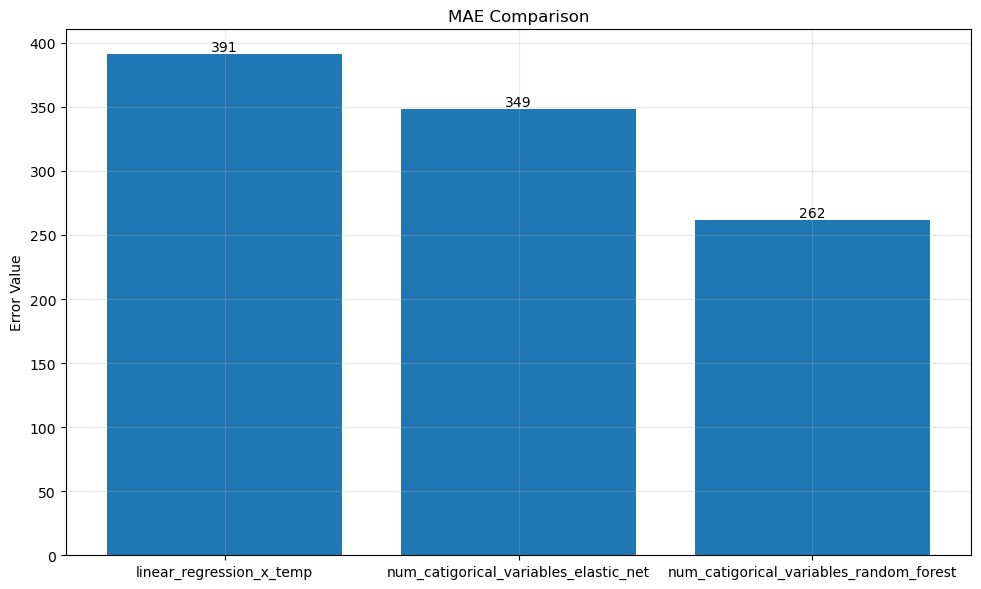

In [118]:
import matplotlib.pyplot as plt

metrics = {
   'linear_regression_x_temp': MAE_lr_x_temp_train,
   'num_catigorical_variables_elastic_net': MAE_num_catigorical_variables_Elastic_Net,
   'num_catigorical_variables_random_forest': MAE_num_catigorical_variables_Random_Forest,
}

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values())
for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}',
            ha='center', va='bottom')
plt.title('MAE Comparison')
plt.ylabel('Error Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()